# INFO 2950 Group Project: NBA Most Valuable Player (MVP) Candidacy
__Group Members__: Adya Bhargava (ab2446), Akhil Damani (ad674), Madeline Demers (mkd79)


## **Table of Contents**
1. Introduction <br>
    a. Background and Context <br>
    b. Research Question <br>
    c. Summary of Results <br>
    d. Data Collection and Cleaning Summary <br>
2. Data Description
3. Preregistration Statement
4. Data Analysis <br>
    a. Data Exploration <br> 
    b. Hypothesis 1 Analysis <br>
    c. Hypothesis 2 Analysis <br>
    d. Prediction Model
5. Evaluation of Significance
6. Interpretation and Conclusions
7. Limitations
8. *Acknowledgements*
9. *Appendix*

## **1. Introduction**



### A. Background and Context

The Most Valuable Player (MVP) award in the NBA stands as a high award of individual achievement, historically representing far more than statistical excellence. It's a testament to a player's performance and impact throughout a season, influencing multiple facets of the basketball landscape. In simple terms, it is awarded to the player that provides the most value to their team. However, the definition of value can be relatively subjective, making this an statistically interesting concept to further explore. Since there are so many factors that migth contribute to a player becoming selected as an MVP candidate, we considered looking into which factors were most influential to them being selected out of roughly 500 players per season. The drive for individual excellence often translates into collective success, as MVP-caliber players tend to elevate their team's performance. The MVP race captivates the baksetball community and it's a season-long narrative that sparks debates, discussions, and has seen various rule changes over the years. Before the 1979-80 season, NBA players determined the recipient of this award. However, since then, the responsibility shifted to sportswriters and broadcasters, forming a global panel of 100 members along with one fan vote to designate the recipient.
Each panel member casts five votes, ranking players from first to fifth place, each position carrying varying points. The player amassing the highest points from these voters claims the coveted title of NBA MVP. The specific criteria guiding the MVP selection process have never been officially disclosed, shrouding the decision-making process in mystery. It might seem straight forward that for example a player that scores more points is more valuable, but this is not necessarily the definition of "valuable" in terms of the award's meaning. In this project, we aim to assess which factors are statistically significant and predict the likeihood of a player being named as an MVP candidate, putting them up to the voting process to see if they will bring home the coveted award. The report includes basketball specific acronyms and terms (especially in the data), which are further described in the data description. The data was sourced from Basketball Reference, a sports statistics site, as well as from the NBA site itself.


### B. Research Question
**(Revised)** Is there a relationship between particular player or team statistics and a player being named as a candidate for the Most Valuable Player (MVP) award in the National Basketball Association (NBA) League? 

- **Sub Questions**
  - Can we build a prediction model for stat lines that are more likely to be nominated as a candidate/win the MVP award?  
- **Original Research Question**
  - Is there a relationship between particular player or team statistics and the Most Valuable Player (MVP) award in the National Basketball Association (NBA) League? 
    - In the process of working on the project we realized that the data we had, although spanning 20 seasons was not sufficent in volume to predict an MVP since there is only one per season, leaving us with only 20 data points. We decided to shift to the NBA candidates, which is typically about 10 per year, providing us with more data.


### C. Summary of Findings
We hypothesized that players would be more likely to be a candiate for the MVP award based on two factors: firstly, the average number of points scored by them per game, and second, the quality (in terms of winnings) of the team they belong to. Based on running logistic regressions on the influence of both of these factors, we found that both of them had statistically significant impact on the likelihood of an individual being a candidate for the MVP award: our hypothesis were proved correct. Based on this analysis, it would seem as if the higher points an individual scored had a positive impact on the likelihood of them being nominated for the MVP award. It would also seem as if the quality (or wins) of a team had a positive impact on the likelihood of the players of that team being nominated for the MVP.

### D. Data Collection and Cleaning Summary
The process of data collection and cleaning was an involved process from which we gathered data from the past 20 years (20 seasons) of NBA player and team statistics as well as historical award information related to the MVP award winners and candidates. It describes and contains the code for how we collected our data by scraping the NBA site and Basketball Reference. In order to do this we had to find data that was legal to scrape and unlocked, which proved to be a difficult process. For example, the NBA site lets users access the player data, but not the team data. Furthermore, similar site also proved to be challenging in terms of accessing the data so to get the historical list of MVPs for the past 20 years, we ended up having to scrape a text article in order to get this data.  We ended up with serveral '.csv' files which we use as our main data sources in the report. See the appendix for the file that contains the code and descriptions for collection and cleaning of the data useed in this main report.


In [292]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import duckdb
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score

In [293]:
mvp_df = pd.read_csv('Appendix/mvp_df.csv')
mvp_candidates_df = pd.read_csv('Appendix/mvp_candidates.csv')
player_stats_df = pd.read_csv('Appendix/player_stats.csv')
all_team_stats_df = pd.read_csv('Appendix/all_team_stats.csv')
player_stats_df = player_stats_df.drop("Unnamed: 0", axis=1)
all_team_stats_df = all_team_stats_df.drop("Unnamed: 0", axis=1)
mvp_candidates_df = mvp_candidates_df.drop("Unnamed: 0", axis=1)
mvp_df = mvp_df.drop("Unnamed: 0", axis=1)


## **2. Data Description**

**What are the observations (rows) and the attributes (columns)?**

In the player_stats_df the observations (rows) are the statistics of all of the players in the NBA from the 2003-2004 season to the 2022-23 season. The attributes (columns) are as follows:
  - PLAYER: Player Name
  - TEAM: Team Name as an abbreviation
  - FULL_NAME: The full name of the team
  - SEASON: The season of play for that row's statistics
  - GP: Games played
  - MIN: Minutes played
  - FGM: Field Goals Made
  - FGA: Field Goals Attempted
  - FG_PCT: Field Goal Percentage
  - FG3M: 3 Point Field Goals Made
  - FG3A: 3 Point Field Goals Attempted
  - FG3_PCT: 3 Point Field Goal Percentage
  - FTM: Free Throws Made
  - FTA: Free Throws Attempted
  - FT_PCT: Free Throws Percentage
  - OREB: Offensive Rebounds
  - DREB: Defensive Rebounds
  - REB: Rebounds
  - AST: Assists
  - STL: Steals
  - BLK: Blocks
  - TOV: Turnovers
  - PTS: Points
  - EFF: Player Efficiency Rating
    - (Calculated as (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP)
  - is_mvp: A binary variable indicating if the player is an MVP for that particular season (1) or not (0)
  - is_candidate: A binary variable indicating if the player is an MVP candidate for that particular season (1) or not (0)
  - W: Number of wins the player's team has for that season
  - L: Number of losses the player's team has for that season

In the team_stats_df, the observations (rows) are the team statistics for all of the seasons between 2003-2004 to 2022-2023 and the attributes (columns) are as follows:
  - 'Rk': Rank (per season)
  - 'Team': Team Name
  - 'G': Games Played
  - 'MP': Minutes Played
  - 'FG': Field Goals
  - 'FGA': Field Goals Attempted
  - 'FG%': Field Goal Percentage
  - '3P': 3 Point Field Goals
  - '3PA': 3 Point Field Goal Attempts
  - '3P%': 3 Point Field Goal Percentage
  - '2P': 2 Point Field Goals
  - '2PA': 2 Point Field Goal Attempts
  - '2P%': 2 Point Field Goal Percentage
  - 'FT': Free Throws
  - 'FTA': Free Throw Attempts
  - 'FT%': Free Throw Percentage
  - 'ORB': Offensive Rebounds
  - 'DRB': Defensive Rebounds
  - 'TRB': Total Rebounds
  - 'AST': Assists
  - 'STL': Steals
  - 'BLK': Blocks
  - 'TOV': Turnovers
  - 'PF': Personal Fouls
  - 'PTS': Points
  - 'Age': Average Age in Team
  - 'W': Wins
  - 'L': Losses
  - 'Season': Season
- The MVP data set has observations (rows) for each season's MVP. The columns or attributes are originally the season years and the name of the MVP (these were merged in the cleaning process to get more data).

**Why was this dataset created?**
  
  The 'player_stats_df' was created in order to track and save the historical statistics of NBA players during their regular season.
  The 'team_stats_df' was created to track the historical statistics of the teams for each NBA season for the past 20 years
  The 'mvp_df' was created to track the historical list of MVPs for the past 20 seasons of the NBA
  The 'mvp_candidates_df' was created to track the historical list of MVP candidates for the past 20 seasons of the NBA

**Who funded the creation of the dataset?**
  
  The NBA funded the player_stats_df data set and the insights were run with SAP. The NBA funded the article that was scraped to get the list of historical MVPs. The team_stats and mvp_candidates_df were funded by Sports Reference LLC and Stathead.

**What processes might have influenced what data was observed and recorded and what was not?**
  
  The processes that influenced what data was observed and recorded and what was not was likely realted to the typical gameplay of an NBA game and what statistics are significant, such as points, rebounds, and other values. Other aspects of a player's performance may receive less attention.

**What preprocessing was done, and how did the data come to be in the form that you are using?**
  
  The preprocessing done can be seen in the data_collection file, which was mostly consistent of web scraping by us. We collected the data straight from the source and then cleaned it in this file. The data came in to be in the form that we are using by finding reliable sources and then collecting that data and cleaning it for proper and effective use. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
  
  The people involved are all NBA players, who are listed in the data set and since they signed a contract to play in the NBA it is expected that they are aware this data was being collected and used for purposes such as analytics and insights, as we are doing here.
  
**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box).**
  
  - https://www.basketball-reference.com/leagues/NBA_2004.html (and all other years, for seasons 2003-2004 to 2022-2023)
  - https://www.nba.com/stats/leaders (for all seasons from 2003-04 to 2022-23)
  - "https://www.nba.com/news/history-mvp-award-winners"


## **3. Preregistration Statement**

**Hypothesis 1:** The player with the most points per game on average during the season is more likely to be a candidate for the award than other players.

- $H_0$: The player with the most points per game on average during the season has an equal or lesser likelihood of being a candidate for the award compared to other players.
- $H_A$: The player with the most points per game on average during the season is more likely to be a candidate for the award than other players.

**Hypothesis 2:** The team with the most wins is more likely to have one of its players be a candidate for MVP.
- $H_O$: The team with the most wins has an equal or lesser likelihood of having one of its players be a candidate for MVP compared to other teams.
- $H_A$: The team with the most wins is more likely to have one of its players be a candidate for MVP than other teams.

## 4. Data Analysis

### A. Exploratory Data Analysis (EDA)

Reviewing the correlation between variables

In [294]:

features = ['is_candidate','is_mvp','GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'EFF', 'W', 'L']
player_stats_df[features].corr()

,is_candidate,is_mvp,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,W,L
is_candidate,1.000000,0.274710,0.045265,0.323211,0.481428,0.444319,0.103499,0.133718,0.140151,0.040034,...,0.319305,0.260728,0.370727,0.301986,0.149096,0.429914,0.504438,0.521072,0.126070,-0.122245
is_mvp,0.274710,1.000000,0.027696,0.089562,0.168981,0.144089,0.053673,0.068405,0.066046,0.032672,...,0.125748,0.098492,0.162596,0.102587,0.039812,0.166043,0.178107,0.205405,0.062213,-0.062062
GP,0.045265,0.027696,1.000000,0.218192,0.082935,0.081149,0.011809,-0.069430,-0.082386,-0.070620,...,0.076814,0.091113,0.042666,0.095826,0.056520,0.102284,0.070819,0.081687,0.131215,0.077009
MIN,0.323211,0.089562,0.218192,1.000000,0.833492,0.843891,0.025510,0.399742,0.411094,0.162627,...,0.542359,0.463567,0.581035,0.634239,0.183477,0.732584,0.832463,0.806853,0.010650,-0.001028
FGM,0.481428,0.168981,0.082935,0.833492,1.000000,0.971936,0.161762,0.388021,0.402872,0.145931,...,0.560406,0.482172,0.550472,0.510512,0.195773,0.787236,0.983246,0.897181,0.066099,-0.070067
FGA,0.444319,0.144089,0.081149,0.843891,0.971936,1.000000,-0.049567,0.504745,0.530999,0.229898,...,0.455501,0.356322,0.595522,0.548324,0.079434,0.794824,0.976040,0.819409,0.034353,-0.037784
FG_PCT,0.103499,0.053673,0.011809,0.025510,0.161762,-0.049567,1.000000,-0.419965,-0.461846,-0.397038,...,0.437524,0.533433,-0.145967,-0.115130,0.502076,0.029085,0.083476,0.355404,0.119298,-0.122626
FG3M,0.133718,0.068405,-0.069430,0.399742,0.388021,0.504745,-0.419965,1.000000,0.988152,0.585029,...,-0.085919,-0.233538,0.368210,0.303144,-0.324759,0.263058,0.478367,0.234365,0.089058,-0.115750
FG3A,0.140151,0.066046,-0.082386,0.411094,0.402872,0.530999,-0.461846,0.988152,1.000000,0.573045,...,-0.081268,-0.232949,0.396624,0.333471,-0.328481,0.295921,0.494039,0.240340,0.073575,-0.101378
FG3_PCT,0.040034,0.032672,-0.070620,0.162627,0.145931,0.229898,-0.397038,0.585029,0.573045,1.000000,...,-0.216826,-0.337989,0.251568,0.186584,-0.374329,0.082351,0.201601,0.014323,0.047880,-0.062409


In this plot, we compare the average points of players across the 2010-11 season with the average number of points for the MVP to visualize this comparison. 

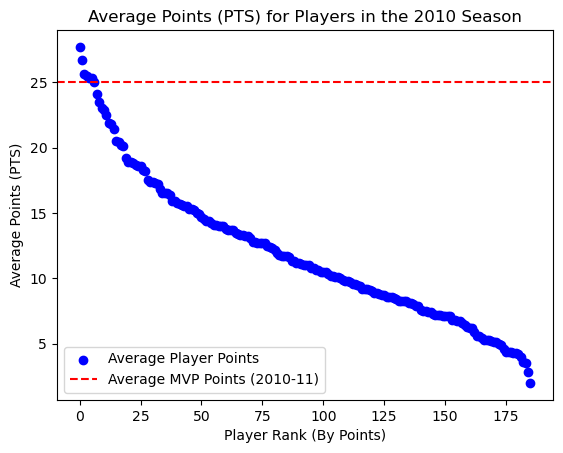

In [295]:
player_stats_2010 = player_stats_df[player_stats_df['SEASON'] == '2010-11']
mvp_stats_2010 = player_stats_df[(player_stats_df['SEASON'] == '2010-11') & (player_stats_df['is_mvp'] == 1)]

player_pts_2010 = player_stats_2010['PTS']

mvp_pts_2010 = mvp_stats_2010['PTS'].values[0]

plt.scatter(range(len(player_pts_2010)), player_pts_2010, label=\
            'Average Player Points', color='blue')
plt.axhline(y=mvp_pts_2010, color='red', linestyle='--',\
             label='Average MVP Points (2010-11)')
plt.title('Average Points (PTS) for Players in the 2010 Season')
plt.xlabel('Player Rank (By Points)')
plt.ylabel('Average Points (PTS)')
plt.legend()
plt.show()

Visualizing the relationship between the average points of the MVP player and the average of all players for each year

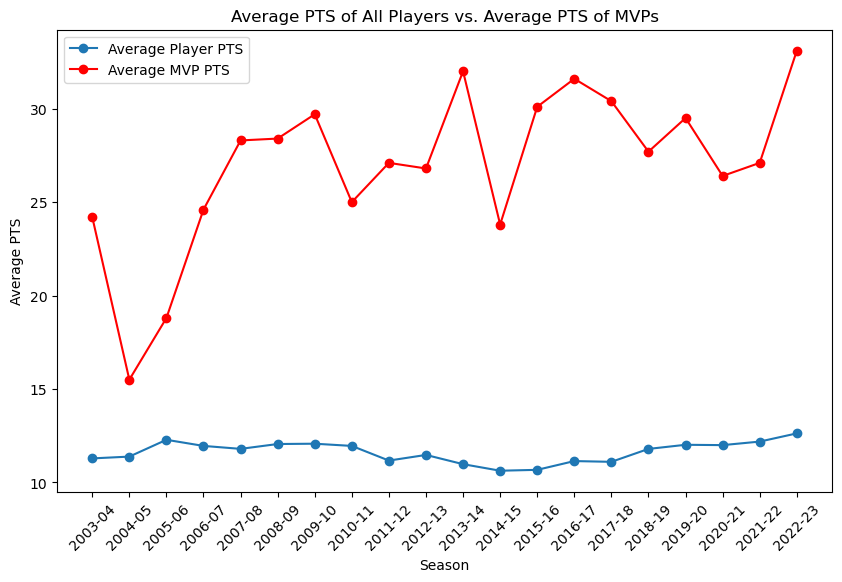

In [296]:
avg_player_pts_by_season = player_stats_df.groupby('SEASON')['PTS'].mean()

avg_mvp_pts_by_season = player_stats_df[player_stats_df['is_mvp'] == 1].groupby('SEASON')['PTS'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_player_pts_by_season.index, avg_player_pts_by_season.values, marker='o', label='Average Player PTS')
plt.plot(avg_mvp_pts_by_season.index, avg_mvp_pts_by_season.values, marker='o', label='Average MVP PTS', color='red')

plt.title('Average PTS of All Players vs. Average PTS of MVPs')
plt.xlabel('Season')
plt.ylabel('Average PTS')
plt.xticks(rotation=45) 
plt.legend()
plt.show()

This shows the average points by players over the years

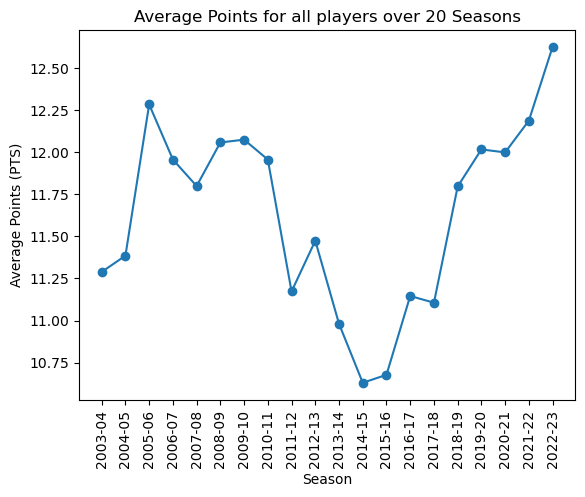

In [297]:
average_pts = player_stats_df.groupby('SEASON')['PTS'].mean()

plt.plot(average_pts, marker='o')
plt.title('Average Points for all players over 20 Seasons')
plt.xlabel('Season')
plt.ylabel('Average Points (PTS)')
plt.xticks(rotation=90)
plt.show()


This shows the average of all assists over 20 seasons 

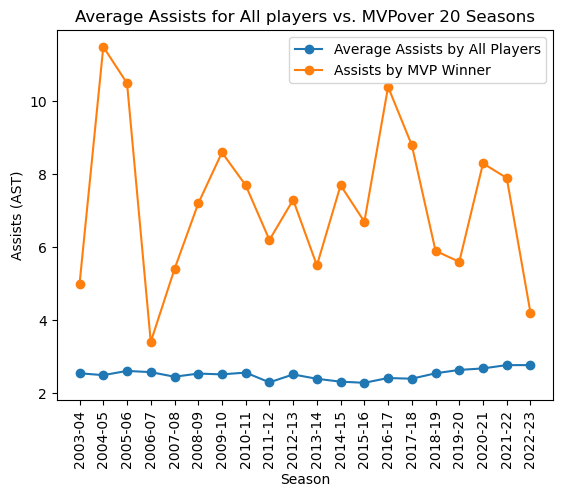

In [298]:
average_ast = player_stats_df.groupby('SEASON')['AST'].mean()
mvp_ast_by_season = player_stats_df[player_stats_df['is_mvp'] == 1].groupby('SEASON')['AST'].mean()

plt.plot(average_ast, marker='o', label = 'Average Assists by All Players')
plt.plot(mvp_ast_by_season, marker='o', label = 'Assists by MVP Winner')

plt.title('Average Assists for All players vs. MVPover 20 Seasons')
plt.xlabel('Season')
plt.ylabel('Assists (AST)')
plt.xticks(rotation=90)
plt.legend()
plt.show()


TO DO: Explain Drop

This aims to show the average age of MVP candidates in the NBA over 20 years

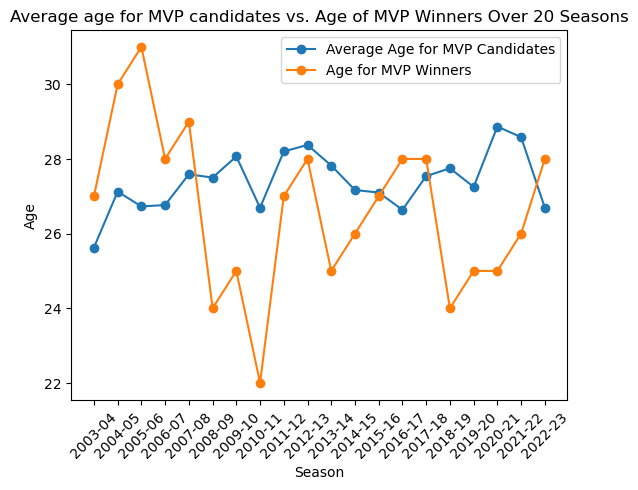

In [299]:
average_age = mvp_candidates_df.groupby('SEASON')['Age'].mean()
age = mvp_candidates_df[mvp_candidates_df['is_mvp'] == 1].groupby('SEASON')['Age'].mean()

plt.plot(average_age, marker='o', label='Average Age for MVP Candidates')
plt.plot(age, marker='o', label='Age for MVP Winners')
plt.title('Average age for MVP candidates vs. Age of MVP Winners Over 20 Seasons')
plt.xlabel('Season')
plt.ylabel('Age')
plt.xticks(rotation=45)  
plt.legend()
plt.show()


This plots aims to show the average amount of wins for a team that has an mvp player vs the average nba team 

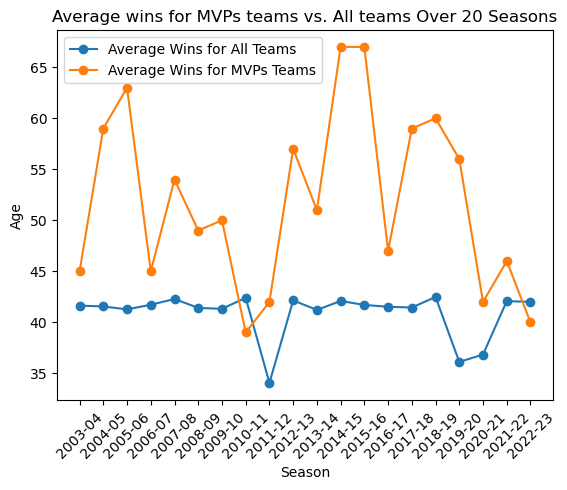

In [300]:
nba_avg_wins = player_stats_df.groupby('SEASON')['W'].mean()
mvp_avg_wins = player_stats_df[player_stats_df['is_mvp'] == 1].groupby('SEASON')['W'].mean()

plt.plot(nba_avg_wins, marker='o', label='Average Wins for All Teams ')
plt.plot(mvp_avg_wins, marker='o', label='Average Wins for MVPs Teams')
plt.title('Average wins for MVPs teams vs. All teams Over 20 Seasons')
plt.xlabel('Season')
plt.ylabel('Age')
plt.xticks(rotation=45)  
plt.legend()
plt.show()

Checking how many times there have been repeat MVP winners

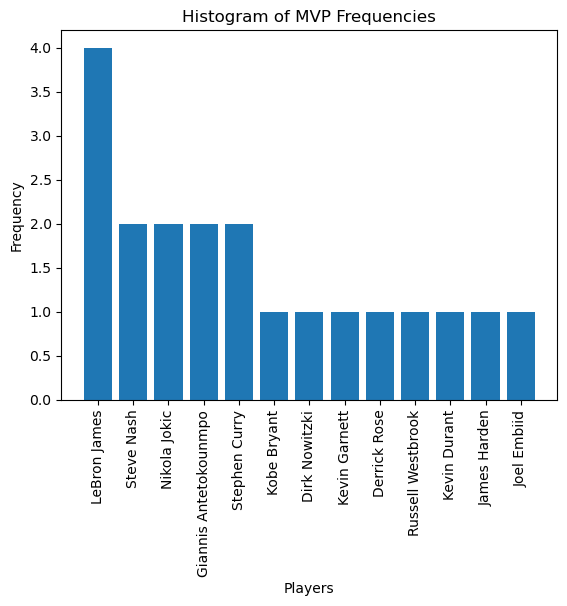

In [301]:
name_counts = mvp_stats['PLAYER'].value_counts()
plt.bar(name_counts.index, name_counts.values)
plt.xlabel('Players')
plt.ylabel('Frequency')
plt.title('Histogram of MVP Frequencies')
plt.xticks(rotation=90)
plt.show()


### B. Hypothesis 1 Analysis

Hypothesis 1: The player with the most points per game on average during the season is more likely to win the award than other players.


For this analysis, we decided to run a logistic regression. We used the statsmodel Logit function and the lecture slides to help us. We got a summary of the results to better understand how this compares to our hypothesis.


In [302]:
#Making sure that repeated names across different seasons do not impact the regression
regression_df = player_stats_df.copy()
regression_df['Last_2_Digits_Season'] = player_stats_df['SEASON'].str[-2:]
regression_df['Player_With_Last_2_Digits'] = regression_df['PLAYER'] + '_' + regression_df['Last_2_Digits_Season']


X = player_stats_df[['PTS']]
X = sm.add_constant(X)
y = player_stats_df['is_candidate'].astype(int)


#Source: Lecture notes
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.109520
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           is_candidate   No. Observations:                 4386
Model:                          Logit   Df Residuals:                     4384
Method:                           MLE   Df Model:                            1
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                  0.5005
Time:                        14:53:00   Log-Likelihood:                -480.36
converged:                       True   LL-Null:                       -961.72
Covariance Type:            nonrobust   LLR p-value:                2.277e-211
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.4594      0.395    -23.975      0.000     -10.233      -8.686
PTS            0.3858      0.

### C. Hypothesis 2 Analysis


Hypothesis 2: The team with the most wins is more likely to have one of its players win 

For this analysis, we used the statsmodel Logit function and the lecture slides to run a logistic regression. We got a summary of the results to better understand how this compares to our hypothesis.


In [303]:
X = player_stats_df[['W']]
X = sm.add_constant(X)
y = player_stats_df['is_mvp'].astype(int)
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.027025
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 is_mvp   No. Observations:                 4386
Model:                          Logit   Df Residuals:                     4384
Method:                           MLE   Df Model:                            1
Date:                Fri, 01 Dec 2023   Pseudo R-squ.:                 0.07227
Time:                        14:53:01   Log-Likelihood:                -118.53
converged:                       True   LL-Null:                       -127.76
Covariance Type:            nonrobust   LLR p-value:                 1.730e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5333      1.169     -8.152      0.000     -11.825      -7.241
W              0.0889      0

### D. Prediction Model

Akhil's Predictive Modeling

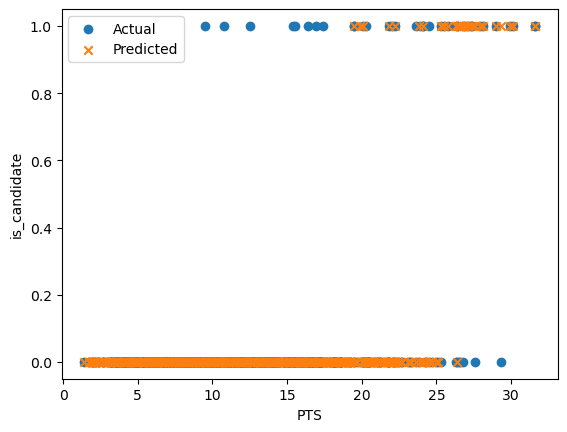

In [304]:
def Normalizer(x):
  scaler = preprocessing.StandardScaler().fit(x)
  return(scaler.transform(x))

columns = ['PLAYER', 'TEAM', 'FULL_NAME', 'SEASON', 'GP', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'EFF', 'Rk', 'Team',
       'G', 'MP', 'FG', 'FGA_2', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'FT', 'FTA_2', 'FT%', 'ORB', 'DRB', 'TRB', 'AST_2', 'STL_2', 'BLK_2',
       'TOV_2', 'PF', 'PTS_2', 'Age', 'W', 'L', 'Season']

features = ["PTS", "AST", "FG_PCT", "W", "FG3_PCT", "STL", "BLK"]

tmp = player_stats_df[player_stats_df["SEASON"] != "2022-23"]
mvp_train, mvp_test = train_test_split(tmp, test_size=0.2, random_state=2950)

model = LogisticRegression()
model.fit(mvp_train[features], mvp_train["is_candidate"])
y_pred = model.predict(mvp_test[features])

accuracy_score(mvp_test["is_candidate"], y_pred)
precision_score(mvp_test["is_candidate"], y_pred)

plt.scatter(mvp_test["PTS"], mvp_test["is_candidate"], label="Actual")
plt.scatter(mvp_test["PTS"], y_pred, marker='x', label="Predicted")
plt.xlabel("PTS")
plt.ylabel("is_candidate")
plt.legend()
plt.show()

Maddy's Predictive Modeling

Testing latest season, training on past seasons

In [305]:
X = player_stats_df[['PTS']]
y = player_stats_df['is_candidate'].astype(int)

train_seasons = ["2003-04", "2004-05", "2005-06", "2006-07", "2007-08", "2008-09", "2009-10", "2010-11", \
    "2011-12", "2012-13", "2013-14", "2014-15", "2015-16", "2016-17", "2017-18", "2018-19", "2019-20", "2020-21", \
    "2021-22"]
test_season = ["2022-23"]

X_train = X[player_stats_df['SEASON'].isin(train_seasons)]
y_train = y[player_stats_df['SEASON'].isin(train_seasons)]

X_test = X[player_stats_df['SEASON'].isin(test_season)]
y_test = y[player_stats_df['SEASON'].isin(test_season)]

log_reg = LogisticRegression()

model_og = log_reg.fit(X_train, y_train)

predictions = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report= classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9510204081632653
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       233
           1       0.50      0.75      0.60        12

    accuracy                           0.95       245
   macro avg       0.74      0.86      0.79       245
weighted avg       0.96      0.95      0.96       245



In [307]:
def predict_mvp_candidate(player_name, season, model_og, points_fetch_function):
    # Get the number of points for the specified player

    player_in_season = (player_stats_df['PLAYER'] == player_name) & (player_stats_df['SEASON'] == season)

    if not player_in_season.any():
        return f"No data found for {player_name} in {season}. They did not qualify for rate stats for the {season} season."

    season_data = player_stats_df[player_stats_df['SEASON'] == season]
    player_points = season_data[season_data['PLAYER'] == player_name]['PTS'].values.reshape(-1, 1)


    # Prepare the input data for the model prediction
    input_data = player_points  # Assuming your model expects a 2D array
    
    # Predict using the provided model
    prediction = model.predict(input_data)
    
    if prediction[0] == 1:
        return f"{player_name} is predicted to be an MVP candidate!"
    else:
        return f"{player_name} is not predicted to be an MVP candidate."

In [308]:
player_name = "LeBron James"
target_season = "2022-23"

prediction_result = predict_mvp_candidate(player_name, target_season, log_reg, player_stats_df)
print(prediction_result)

No data found for LeBron James in 2022-23. They did not qualify for rate stats for the 2022-23 season.


In [309]:
player_name = "DeMar DeRozan"
target_season = "2022-23"

prediction_result = predict_mvp_candidate(player_name, target_season, log_reg, player_stats_df)
print(prediction_result)

DeMar DeRozan is not predicted to be an MVP candidate.


/Applications/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [310]:
player_name = "Aaron Holiday"
target_season = "2022-23"

prediction_result = predict_mvp_candidate(player_name, target_season, log_reg, player_stats_df)
print(prediction_result)

Aaron Holiday is not predicted to be an MVP candidate.


/Applications/anaconda3/envs/info2950/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 5. Evaluation of Significance


For Hypothesis 1: The significance level is 0, which is less than 0.05, thus we reject our null hypothesis. A player scoring more points per season indicates that they are not equally as likely as other players to be a candidate for the most valuable player award. Since the coefficient was greater than 0, then this means that scoring more points increases the chance that a player will be named an MVP candidate.

For Hypothesis 2: The significance level is 0, which is less than 0.05, thus we reject our null hypothesis. A player being on a team that wins more games per season indicates that they are not equally as likely as other players to be a candidate for the most valuable player award. Since the coefficient was greater than 0, then this means that being a part of a team that has been winning more games increases the chance that a player will be named an MVP candidate.

## 6. Interpretation & Conclusions




### Hypothesis 1:
- We reject the null hypothesis in this case, determining that a player scoring more points (‘PTS’) makes them not equally as likely to win MVP than other players. 
- For each unit increase in 'PTS', the log-odds of a player being an MVP candidate increases by approximately 0.3858 (look at the units!)
- The coefficient for 'PTS' is statistically significant (p < 0.05), indicating that the variable, ‘PTS’, has a significant impact on predicting whether a player is an MVP candidate or not. 
- According to this logistic regression model, there is a statistically significant relationship between the number of points scored (PTS) and the likelihood of a player being an MVP candidate. 
- As the number of points scored increases, the odds of being an MVP candidate also increase.
- TO DO

### Hypothesis 2: 
- We reject the null hypothesis in this case, determining that a player belonging to a team winning more games (‘W’) makes them not equally as likely to win MVP than other players.
- For each additional win (increase in 'W'), the log-odds of a player being an MVP increases by approximately 0.0889.
- The coefficient for ‘W’ is statistically significant (p < 0.05), indicating that the variable, ‘W’, has a significant impact on predicting whether a player is an MVP candidate or not. 
- According to this logistic regression model, there appears to be a statistically significant relationship between the number of wins a team has and the likelihood of a player being an MVP. Specifically, for each additional win, there is an increase in the odds of a player being an MVP.
- TO DO

## 7. Limitations

The dataset scraped and built for the project encompasses a comprehensive collection of statistics and historical records spanning the past 20 seasons of the NBA including specifics about players and teams as well as the historical records of who received the MVP award for the past 20 seasons. It is a set that will be a resource for us when we aim to build a predictive model to estimate the probability of a player receiving the MVP award in future seasons. This dataset comprises various types of information, including individual player statistics, team statistics, and records of MVP winners, offering a multi-faceted view of the league's performance dynamics.

While this dataset has a lot of quality data that has been carefully collected and cleaned, it is not without its limitations. One notable challenge is data quality, where missing values and errors could potentially affect the integrity of the analyses. In the collection and cleaning process, we were sure to address this the best we could. Moreover, the data may be influenced by selection biases, as MVP awards can be influenced by non-statistical factors, such as media attention and player popularity. The dataset's relatively small sample size of MVPs compared to the total player population can present statistical challenges. Furthermore, it is essential to consider the evolving nature of the game, encompassing rule changes, shifts in playing style, and variations in MVP selection criteria, which the dataset might not fully encapsulate. There also is consideration not addressed for player injuries, retirements, team trades, and other insights that might be at play in the selection process. That being said, our data also covers the time during the pandemic when fewer games were played and the regular seasons were interrupted. Given the relatively small number of MVPs each season, there is a risk of overfitting the model to historical MVPs, making it less applicable for predicting future MVPs. Also, if player statistics are highly correlated, this can lead to multicollinearity issues when building predictive models. This can make it challenging to determine which individual statistics truly contribute to MVP selection. 

TO DO: Be more specific about which variables exactly were missing and how much were you able to address them.

## 9. Appendix

Please see the following in our GitHub repository:
(https://github.com/INFO-2950-FA23/GroupProject)
- appendix.ipynb - for data collection and cleaning description
- See the appendix folder for all of the '.csv' files used in our project